In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# path = '/Users/aqian/Downloads/'
# #path = 'M:/Edmund'
# os.chdir(path)
df = pd.read_csv("NRD 2013 (machine learning).csv")
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [4]:
# Check the top 15 rows
df.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,66,0,0.0,2.242874,1.0,6,2,309,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,66,0,0.0,1.919980,6.0,8,3,386,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,66,0,0.0,1.919980,6.0,9,3,329,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,66,1,0.0,1.919980,6.0,10,4,862,31,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Make a copy of the dataframe
df_copy = df.copy()
df_copy.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,66,0,0.0,2.242874,1.0,6,2,309,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,66,0,0.0,1.919980,6.0,8,3,386,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,66,0,0.0,1.919980,6.0,9,3,329,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,66,1,0.0,1.919980,6.0,10,4,862,31,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# Check the back end of the data
df_copy.tail(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
94483,94483,66,0,0.0,1.814426,1.0,5,2,544,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94484,94484,66,1,0.0,1.814426,1.0,5,2,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94485,94485,66,0,0.0,1.814426,6.0,6,2,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94486,94486,67,1,0.0,1.814426,6.0,7,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94487,94487,67,0,0.0,1.814426,6.0,8,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94488,94488,67,1,0.0,1.814426,6.0,8,3,542,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94489,94489,67,0,0.0,1.814426,1.0,9,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94490,94490,67,0,0.0,1.814426,5.0,12,4,490,31,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94491,94491,32,1,0.0,1.625102,1.0,4,2,775,30,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94492,94492,54,0,0.0,1.995433,1.0,3,1,345,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# Check the data 
# Looks like the ibd_readm variables contains "NA" values

df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0
5,000dbz,0,42731,0,1
6,000dbz,0,5559,0,1
7,000dbz,0,5552,0,1
8,000dbz,0,99859,0,1
9,000mgu,1,55221,0,0


In [8]:
# # Recoding the ibd_readm outcome variable
# readm_set = set()
# for row in df_copy.itertuples():
#     if row.ibd_readm == 1:
#         readm_set.add(row.nrd_visitlink)
        
# readm_list = list(readm_set)

# df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
# df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1
5,000dbz,0,1
6,000dbz,0,1
7,000dbz,0,1
8,000dbz,0,1
9,000mgu,1,0


In [9]:
# df_copy['ibd_readm'] = df_copy['ibd_readm'].fillna(0)

df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1
5,000dbz,1.0,0,1
6,000dbz,1.0,0,1
7,000dbz,1.0,0,1
8,000dbz,1.0,0,1
9,000mgu,3.0,1,0


In [10]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [11]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [12]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [ ]:
# # Number of rows with null values
# readm_data_df.isna().sum()

In [ ]:
# Drop all rows with null values
# readm_data_df_clean = readm_data_df.dropna(axis='columns')

# # Check the data
# print(readm_data_df["ibd_index_hosp"].count())
# print('-' * 15)

# # Check the data 
# print(readm_data_df.head(15))
# print('-' * 15)

# # Check the data 
# print(readm_data_df.tail(15))
# print('-' * 15)

In [13]:
print(readm_data_df.columns.values)
# readm_data_df_clean

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [ ]:
# List of all the variables in the dataset
['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

### Grabbing the features

In [66]:
# Grab the features

# data = readm_data_df[['age', 'zipinc_qrtl', 'female', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 
#                       'hosp_ur_teach', 'aweekend', 'elective', 'los', 'payer', 'cc_index', 'frailty_risk_score', 
#                       'prevent_readm', 'cardiac_adm', 'cvd_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 
#                       'neuro_adm', 'malignancies_adm', 'fracture_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm',
#                       'severe_IBD_hospitalization', 'ibd_readm']]

# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'cc_index', 'ibd_readm']]

data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'ibd_specific_adm', 'infxn_adm', 'new_cdiff_adm',
                      'hosp_bedsize', 'h_contrl', 'payer', 'cc_index', 'hosp_urcat4', 'ibd_readm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

,age,frailty_risk_score,los,zipinc_qrtl,ibd_specific_adm,infxn_adm,new_cdiff_adm,hosp_bedsize,h_contrl,payer,cc_index,hosp_urcat4,ibd_readm
0,89,4.7,4,4.0,0,1,1,3,1,1.0,2,1,1
3,48,0.5,4,3.0,1,0,0,3,1,2.0,0,2,0
4,65,5.7,5,2.0,1,0,0,2,2,1.0,0,2,1
9,51,2.8,3,4.0,0,0,0,2,2,2.0,0,2,0
10,22,3.8,6,2.0,0,0,0,3,2,1.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,32,0.0,3,4.0,0,0,0,2,2,2.0,0,1,0
94492,54,0.0,4,4.0,0,0,0,3,2,2.0,0,1,0
94493,44,0.0,9,4.0,1,0,0,3,2,2.0,0,1,1
94496,52,1.5,2,1.0,0,0,0,3,2,1.0,2,2,0


In [63]:
# Correlation matrix
corrMatrix = data.corr()
print(corrMatrix)

                                 age  zipinc_qrtl    female  hosp_bedsize  \
age                         1.000000     0.040667  0.021296     -0.037066   
zipinc_qrtl                 0.040667     1.000000 -0.025209     -0.046114   
female                      0.021296    -0.025209  1.000000     -0.014875   
hosp_bedsize               -0.037066    -0.046114 -0.014875      1.000000   
h_contrl                    0.057608    -0.056592  0.022042     -0.064860   
hosp_urcat4                 0.041243    -0.305578  0.019441     -0.074975   
hosp_ur_teach              -0.049051    -0.132343  0.000174      0.041346   
aweekend                    0.008442    -0.013701  0.003233      0.001513   
elective                   -0.028847     0.033847  0.018688     -0.005065   
los                         0.066278    -0.022854 -0.024857      0.049362   
payer                      -0.417895     0.043966 -0.076497      0.007682   
cc_index                    0.325557    -0.018003 -0.046518      0.022602   

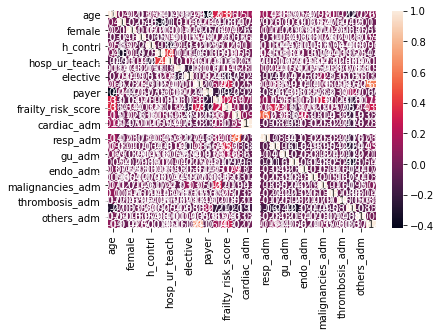

In [64]:
# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["ibd_readm"]
target_names = ["none", "readmitted"]
target = target.astype('int64')
target

0        1
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: ibd_readm, Length: 46632, dtype: int64

In [51]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome = cleaned_data.drop('ibd_readm', axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'ibd_specific_adm',
       'infxn_adm', 'hosp_bedsize', 'h_contrl', 'payer', 'cc_index',
       'hosp_urcat4'],
      dtype='object')

In [52]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

age                   0
frailty_risk_score    0
los                   0
zipinc_qrtl           0
ibd_specific_adm      0
infxn_adm             0
hosp_bedsize          0
h_contrl              0
payer                 0
cc_index              0
hosp_urcat4           0
dtype: int64

In [53]:
# Show rows where the null values are 
# Data check
# check_data = readm_data_df[['nrd_visitlink', 'ibd_index_hosp', 'ibd_readm', 'age', 'zipinc_qrtl', 'female', 'los', 'pay1', 'new_cc_index', 'frailty_risk_score']]
# check_data[check_data.isna().any(axis=1)]

In [54]:
# # Change one of the variables

# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

### Using traditional train-test split

In [46]:
# # Set up training and testing datasets

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

In [18]:
# Build the random forrest classifier

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

### Using k-fold cross-validation

In [55]:
# K-fold validation
# Build the decision tree first

# clf = tree.DecisionTreeClassifier(splitter = "best", max_features = "auto", max_depth = 6)
# clf = tree.DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 6)
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 5)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, cleaned_data_wo_outcome, target, cv=10, scoring='accuracy')
print(scores)

[0.59991424 0.60527444 0.60669097 0.60626206 0.5953249  0.6079777
 0.60068625 0.61698477 0.60304525 0.60154407]


In [ ]:
# # Fit the model on the test dataset and evaluate the output

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# # Evaluate the features of the model

# sorted(zip(rf.feature_importances_, featured_names), reverse=True)

### Using logistic regression

In [56]:
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

scores = cross_val_score(classifier, cleaned_data_wo_outcome, target, cv=10,scoring='accuracy')
print(scores)

[0.59819897 0.58769297 0.58867682 0.59918507 0.59039245 0.60776324
 0.59318036 0.60433198 0.60004289 0.59403817]


### Using support vector machine 

In [ ]:
# # Support vector machine linear classifier
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

In [ ]:
# # Model Accuracy
# print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
# # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             target_names=target_names))

In [ ]:
# from sklearn import tree
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                   feature_names=new_feature_names,  
#                       class_names=target_names,  
#                       filled=True, rounded=True)  
# #                      special_characters=False)

# graph = graphviz.Source(dot_data)  
# graph 